# LSTM

In [1]:
#importing the needed libraries

import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import pandas as pd

In [2]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error, mean_squared_error
import sklearn.metrics as metrics
from math import sqrt

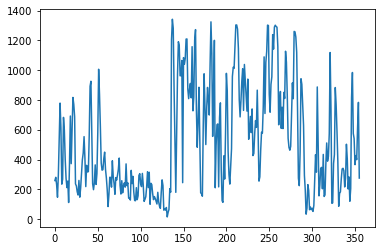

In [3]:
#loading the dataset of active power

dataframe = read_csv('Daily_data.csv', usecols=[1])
plt.plot(dataframe)

In [4]:
#Converting pandas dataframe to numpy array

dataset = dataframe.values

#Converting values to float

dataset = dataset.astype('float32')

In [5]:
#normalizing the dataset

scaler = MinMaxScaler(feature_range=(0, 1)) 
dataset = scaler.fit_transform(dataset)

In [6]:
#spliting into train and test sets

train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [7]:
#seq_size is the number of previous time steps to use as input variables to predict the next time period.
#converting an array of values into a dataset matrix
#X is the active power at a given time (t, t-1, t-2...) 
#Y is the active power at the next time (t + 1).

def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [8]:
seq_size = 5
trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [9]:
print("Shape of training set: {}".format(trainX.shape))
print("Shape of test set: {}".format(testX.shape))

Shape of training set: (228, 5)
Shape of test set: (116, 5)


In [10]:
# Reshaping input to be [samples, time steps, features]

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# model building

In [11]:
#model = Sequential()
#model.add(LSTM(64, input_shape=(None, seq_size)))
#model.add(Dense(32))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam')
#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, verbose=1, mode='auto', restore_best_weights=True)
#model.summary()

In [12]:
#model = Sequential()
#model.add(LSTM(50, activation='relu', input_shape=(None, seq_size)))
#model.add(Dense(1))
#model.compile(optimizer='adam', loss='mse')

In [13]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(None, seq_size)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [14]:
model.fit(trainX, trainY, validation_data=(testX, testY), verbose=2, epochs=150)

Epoch 1/150
8/8 - 5s - loss: 0.2030 - val_loss: 0.2471 - 5s/epoch - 572ms/step
Epoch 2/150
8/8 - 0s - loss: 0.1892 - val_loss: 0.2319 - 120ms/epoch - 15ms/step
Epoch 3/150
8/8 - 0s - loss: 0.1763 - val_loss: 0.2147 - 89ms/epoch - 11ms/step
Epoch 4/150
8/8 - 0s - loss: 0.1612 - val_loss: 0.1930 - 116ms/epoch - 14ms/step
Epoch 5/150
8/8 - 0s - loss: 0.1421 - val_loss: 0.1664 - 126ms/epoch - 16ms/step
Epoch 6/150
8/8 - 0s - loss: 0.1197 - val_loss: 0.1332 - 122ms/epoch - 15ms/step
Epoch 7/150
8/8 - 0s - loss: 0.0928 - val_loss: 0.0962 - 96ms/epoch - 12ms/step
Epoch 8/150
8/8 - 0s - loss: 0.0641 - val_loss: 0.0614 - 78ms/epoch - 10ms/step
Epoch 9/150
8/8 - 0s - loss: 0.0436 - val_loss: 0.0466 - 75ms/epoch - 9ms/step
Epoch 10/150
8/8 - 0s - loss: 0.0425 - val_loss: 0.0499 - 97ms/epoch - 12ms/step
Epoch 11/150
8/8 - 0s - loss: 0.0430 - val_loss: 0.0455 - 75ms/epoch - 9ms/step
Epoch 12/150
8/8 - 0s - loss: 0.0406 - val_loss: 0.0457 - 72ms/epoch - 9ms/step
Epoch 13/150
8/8 - 0s - loss: 0.0399 

8/8 - 0s - loss: 0.0269 - val_loss: 0.0274 - 68ms/epoch - 8ms/step
Epoch 104/150
8/8 - 0s - loss: 0.0269 - val_loss: 0.0272 - 68ms/epoch - 8ms/step
Epoch 105/150
8/8 - 0s - loss: 0.0267 - val_loss: 0.0275 - 72ms/epoch - 9ms/step
Epoch 106/150
8/8 - 0s - loss: 0.0267 - val_loss: 0.0272 - 67ms/epoch - 8ms/step
Epoch 107/150
8/8 - 0s - loss: 0.0268 - val_loss: 0.0276 - 64ms/epoch - 8ms/step
Epoch 108/150
8/8 - 0s - loss: 0.0272 - val_loss: 0.0272 - 67ms/epoch - 8ms/step
Epoch 109/150
8/8 - 0s - loss: 0.0272 - val_loss: 0.0287 - 67ms/epoch - 8ms/step
Epoch 110/150
8/8 - 0s - loss: 0.0268 - val_loss: 0.0274 - 66ms/epoch - 8ms/step
Epoch 111/150
8/8 - 0s - loss: 0.0264 - val_loss: 0.0273 - 65ms/epoch - 8ms/step
Epoch 112/150
8/8 - 0s - loss: 0.0266 - val_loss: 0.0273 - 79ms/epoch - 10ms/step
Epoch 113/150
8/8 - 0s - loss: 0.0265 - val_loss: 0.0276 - 96ms/epoch - 12ms/step
Epoch 114/150
8/8 - 0s - loss: 0.0263 - val_loss: 0.0272 - 72ms/epoch - 9ms/step
Epoch 115/150
8/8 - 0s - loss: 0.0264 - 

# making predictions 

In [15]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

4/4 [==============================] - 0s 3ms/step


In [16]:
#inverting predictions back to prescaled values

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# performance evaluation

In [17]:
#evaluating the performance

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.7f RMSE' % (testScore))

testScore = metrics.mean_squared_error(testY[0], testPredict[:,0])
print('Test Score: %.7f MSE' % (testScore))

testScore = metrics.r2_score(testY[0], testPredict[:,0])
print('Test Score: %.7f R2-SCORE' % (testScore))

testScore = metrics.mean_absolute_error(testY[0], testPredict[:,0])
print('Test Score: %.7f MAE' % (testScore))

Test Score: 220.5746569 RMSE
Test Score: 48653.1792670 MSE
Test Score: 0.6386623 R2-SCORE
Test Score: 168.1976043 MAE


In [18]:
#evaluating the performance

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

trainScore = metrics.mean_squared_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MSE' % (trainScore))

trainScore = metrics.r2_score(trainY[0], trainPredict[:,0])
print('Train Score: %.2f R2-SCORE' % (trainScore))

trainScore = metrics.mean_absolute_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))

Train Score: 211.56 RMSE
Train Score: 44758.63 MSE
Train Score: 0.64 R2-SCORE
Train Score: 159.18 MAE


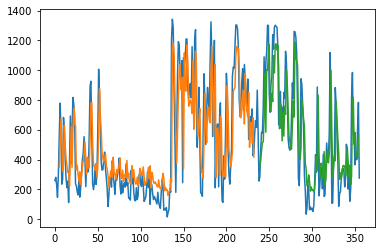

In [19]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [20]:
#pd.DataFrame(trainPredictPlot).to_csv('C:/Users/jayan/OneDrive/Desktop/Dataset/Ptrain.csv')

In [21]:
#pd.DataFrame(testPredictPlot).to_csv('C:/Users/jayan/OneDrive/Desktop/Dataset/Ptest.csv')

In [22]:
#pd.DataFrame(testY).to_csv('C:/Users/jayan/OneDrive/Desktop/Dataset/test.csv')

In [23]:
#pd.DataFrame(trainY).to_csv('C:/Users/jayan/OneDrive/Desktop/Dataset/train.csv')